# Implementing Clustering Algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math

In [2]:
filepath = 'dataset'
def data_import(filepath): 
    # Create an empty list to hold the data
    data = []

    # Open the file and read each line
    with open(filepath) as f:
        for line in f:
            # Split the line into individual values
            values = line.strip().split()

            # Convert each value to a float (except the first one)
            values = [float(v) if i!=0 else v for i,v in enumerate(values)]

            # Add the values to the data list
            data.append(values)

    # Convert the data list to a pandas DataFrame
    data = pd.DataFrame(data)
    label = data.iloc[:, 0]
    lebel = np.array(label)
    # Drop the first column (label)
    data = data.drop(columns=[0])
    data = np.array(data)
    return data, label
data, label = data_import(filepath)

In [3]:
def silhouette_coef(data, maxIter, algorithm):
    silhouette_scores = []
    for k in range(2, 10):
        centers, labels = algorithm(data, k, maxIter)
        # calculate silhouette coefficient
        s = []
        for i in range(len(data)):
            a = np.mean([np.linalg.norm(data[i]-data[j]) for j in range(len(data)) if labels[j] == labels[i]])
            b = min([np.mean([np.linalg.norm(data[i]-data[j]) for j in range(len(data)) if labels[j] == c]) for c in range(k) if c != labels[i]])
            s.append((b-a)/max(a,b))
        silhouette_scores.append(np.mean(s))
    return silhouette_scores

In [4]:
def silhouette_plot(silhouette_scores):
    # plot silhouette scores for each k
    plt.plot(range(2, 10), silhouette_scores)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette coefficient')
    plt.show()

In [5]:
def run_cluster(closest, label):
    data_dict = {'closest': closest, 'label': label}

    # create a dataframe from the dictionary
    df = pd.DataFrame(data_dict)
    return df

## Questions/Tasks 1

#### Explain the k-means clustering algorithm

The K-means clustering algorithm is a type of clustering unsupervised learning algorithm for dividing a dataset into K clusters. The algorithm starts with an initial guess for the K cluster centers, and then iteratively assigns each data point to its closest cluster center, followed by updating the cluster centers to be the mean of the assigned points. This process continues until the cluster centers stop moving or until a maximum number of iterations is reached.

#### Provide pseudo code of the algorithm

#### Implement the k-means clustering algorithm following your explanation and the pseudo code

In [6]:
def kmeans(data, k, maxIter):
    
    np.random.seed(42)
    # init centers
    n = data.shape[0]
    
    centeroid = data[np.random.choice(n, k, replace=False)]    
    closest = np.zeros(n).astype(int)
    
    for iteration in range(maxIter):
        old_closest = closest.copy()
        
        #  update cluster membership
        distances = np.zeros((n,k))
        for i in range(k):
            distances[:,i] = ((data-centeroid[i])**2).sum(axis=1)
        distances
        
        closest = np.argmin(distances, axis=1)
        
        #  update centers
        for i in range(k):
            centeroid[i, :] = data[closest == i].mean(axis=0)
            
        # break if converged
        if all(closest == old_closest):
            break
    centeroid = np.array(centeroid)
    return centeroid, closest

## Questions/Tasks 2

#### Explain the k-means++ clustering algorithm. 

#### Provide pseudo code of the algorithm.

#### Implement the k-means++ clustering algorithm following your explanation and the pseudo code

In [7]:
def kmeans_pp(data, k, maxIter):
    
    # Initialization
    np.random.seed(42)
    n = data.shape[0]
    centeroid = np.zeros((k, data.shape[1]))
    centeroid[0] = data[np.random.choice(n)]
    
    for i in range(1, k):
        # Compute distance to nearest center for each point
        distances = np.zeros(n)
        for j in range(n):
            distances[j] = np.min(np.sum((centeroid[:i] - data[j])**2, axis=1))
        
        # Choose next center with probability proportional to square distance
        prob = distances**2 / np.sum(distances**2)
        centeroid[i] = data[np.random.choice(n, p=prob)]
        
    # K-means iteration
    closest = np.zeros(n).astype(int)
    
    for iteration in range(maxIter):
        old_closest = closest.copy()
        
        #  update cluster membership
        distances = np.zeros((n,k))
        for i in range(k):
            distances[:,i] = ((data-centeroid[i])**2).sum(axis=1)
        
        closest = np.argmin(distances, axis=1)
        
        #  update centers
        for i in range(k):
            centeroid[i, :] = data[closest == i].mean(axis=0)
            
        # break if converged
        if all(closest == old_closest):
            break
            
    return centeroid, closest

## Questions/Tasks 3

#### Explain the Bisecting k-Means hierarchical clustering algorithm. 

#### Provide pseudo code of the algorithm

#### Implement the Bisecting k-Means algorithm following your explanation and the pseudo code.

In [8]:
def bisecting_kmeans(data, k, maxIter):
    # Initialize with all data points in one cluster
    np.random.seed(42)
    
    clusters = [data]
    centroid = [data.mean(axis=0)]
    closest = np.zeros(data.shape[0]).astype(int)

    # Bisect clusters k-1 times
    for i in range(k - 1):
        # Find the cluster with the largest SSE (sum of squared errors)
        max_sse = 0
        max_cluster_index = -1
        for j in range(len(clusters)):
            sse = ((clusters[j] - centroid[j])**2).sum()
            if sse > max_sse:
                max_sse = sse
                max_cluster_index = j

        # Bisect the largest cluster
        bisect_cluster = clusters.pop(max_cluster_index)
        bisect_centroid = centroid.pop(max_cluster_index)

        # Run k-means on the two resulting clusters
        for j in range(2):
            centeroid, closest = kmeans(bisect_cluster, 2, maxIter)
            cluster = [bisect_cluster[closest==j] for j in range(k)]
            clusters.append(cluster[j])
            centroid.append(centeroid[j])

    # Assign cluster labels to each data point
    labels = np.zeros(data.shape[0]).astype(int)
    for i in range(len(clusters)):
        labels[np.isin(data, clusters[i]).all(axis=1)] = i
    centroid = np.array(centroid)
    return centroid, labels

## Questions/Tasks 4

#### Run the k-means clustering algorithm you implemented in part (1) to cluster the given instances

In [9]:
centeroid, closest = kmeans(data, 3, 10)
centeroid.shape

(3, 300)

In [10]:
kmean_instance = run_cluster(closest, label)

#### Vary the value of kfrom 1 to 9 and compute the Silhouette coefficient for each set of clusters

In [11]:
kmeans_silhouette_scores = silhouette_coef(data, 10000, kmeans)
kmeans_silhouette_scores

[0.1525277616533619,
 0.1254423996620156,
 0.14730037604455176,
 0.10231147536355843,
 0.1008193215909744,
 0.09842564288027716,
 0.09185310952970753,
 0.09930530014992404]

#### Plot kin the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot.

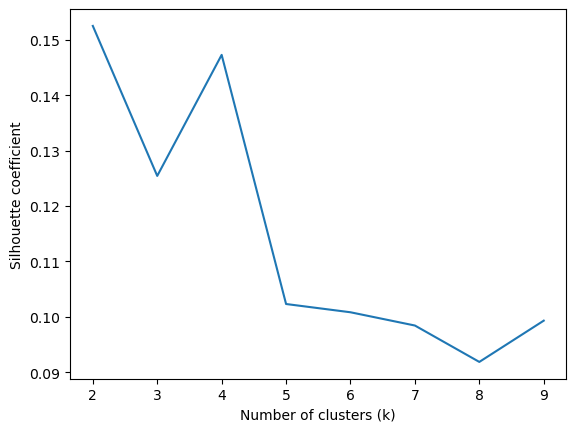

In [12]:
silhouette_plot(kmeans_silhouette_scores)

## Questions/Tasks 5

#### Run the k-means clustering algorithm you implemented in part (1) to cluster the given instances

In [13]:
centeroid, closest  = kmeans_pp(data, 3, 10)
centeroid.shape

(3, 300)

In [14]:
kmean_pp_instance = run_cluster(closest, label)

#### Vary the value of kfrom 1 to 9 and compute the Silhouette coefficient for each set of clusters

In [15]:
kmean_pp_silhouette_scores = silhouette_coef(data, 10000, kmeans_pp)
kmean_pp_silhouette_scores

[0.1525277616533619,
 0.1407424830071672,
 0.1473572330410116,
 0.10485065632773105,
 0.10411163104261621,
 0.10932120051874426,
 0.09670043117524023,
 0.09695340883637663]

#### Plot kin the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot.

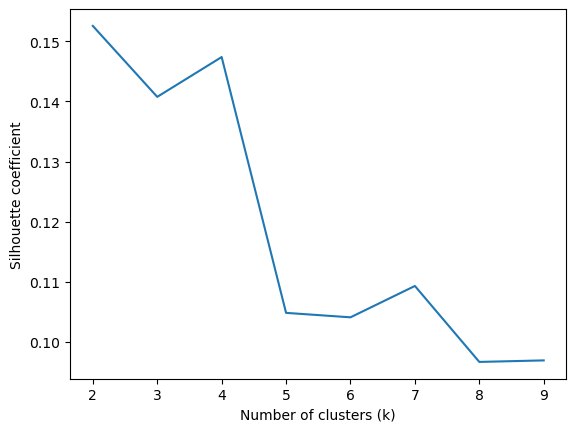

In [16]:
silhouette_plot(kmean_pp_silhouette_scores)

## Questions/Tasks 6

#### Run the k-means clustering algorithm you implemented in part (1) to cluster the given instances

In [17]:
centeroid, closest = bisecting_kmeans(data, 3, 10)
centeroid.shape

(3, 300)

In [18]:
b_kmean_instance = run_cluster(closest, label)

#### Vary the value of kfrom 1 to 9 and compute the Silhouette coefficient for each set of clusters

In [19]:
bisecting_kmeans_silhouette_scores = silhouette_coef(data, 10000, bisecting_kmeans)
bisecting_kmeans_silhouette_scores

[0.1525277616533619,
 0.14096396520119034,
 0.08900959063776609,
 0.1018385073051214,
 0.09866454895595193,
 0.10847294388326363,
 0.10053353894518517,
 0.09345954482505281]

#### Plot kin the horizontal axis and the Silhouette coefficient in the vertical axis in the same plot.

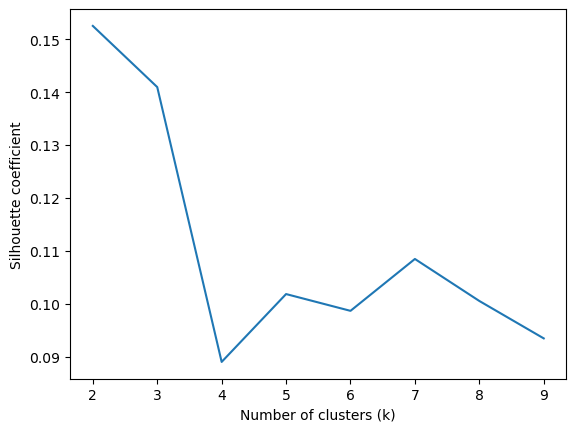

In [20]:
silhouette_plot(bisecting_kmeans_silhouette_scores)

## Questions/Tasks 7

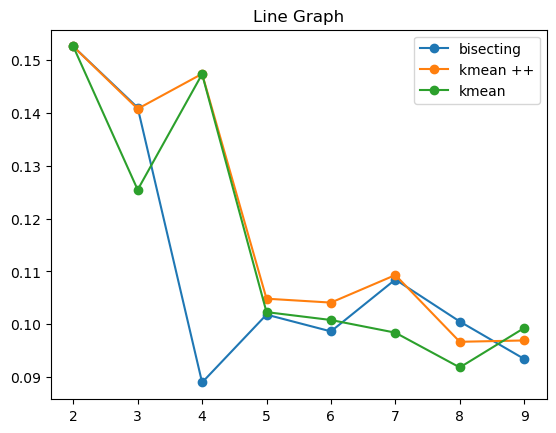

In [31]:
# create a dictionary with the three lists as values and column names as keys
data = {'bisecting': bisecting_kmeans_silhouette_scores, 'kmean ++': kmean_pp_silhouette_scores, 'kmean': kmeans_silhouette_scores}

# create a DataFrame from the dictionary
df = pd.DataFrame(data)

df = df.set_index(pd.Index(range(2, 10)))

# plot a line graph with three lines for each column
plt.plot(df['bisecting'], '-o', label='bisecting')
plt.plot(df['kmean ++'], '-o', label='kmean ++')
plt.plot(df['kmean'], '-o', label='kmean')

# add title and legend to the plot
plt.title('Line Graph')
plt.legend()

# show the plot
plt.show()

In [28]:
df

,bisecting,kmean ++,kmean
2,0.152528,0.152528,0.152528
3,0.140964,0.140742,0.125442
4,0.089010,0.147357,0.147300
5,0.101839,0.104851,0.102311
6,0.098665,0.104112,0.100819
7,0.108473,0.109321,0.098426
8,0.100534,0.096700,0.091853
9,0.093460,0.096953,0.099305


In [23]:
combined_df = pd.concat([kmean_instance, kmean_pp_instance, b_kmean_instance], axis=1)
combined_df = combined_df.iloc[:, [0, 1, 2, 4]]
combined_df = combined_df.set_index('label')

In [24]:
combined_df.columns.values[[0, 1, 2]] = ['kmean clusters', 'kmean ++ clusters', 'bisecting kmean clusters']

In [25]:
combined_df.tail(10)

,kmean clusters,kmean ++ clusters,bisecting kmean clusters
label,,,
radicchio,2,1,2
rhubarb,2,1,2
turnip,2,1,2
radish,2,1,2
courgette,2,1,2
pumpkin,2,2,1
potato,2,1,2
quandong,0,2,1
sunchokes,0,1,2
